<a href="https://colab.research.google.com/github/SarthakNarayan/DL-and-ML/blob/master/googlecolab/GeneralStandards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image transform Standard
Note that for the validation and test data, we do not do the RandomResizedCrop, RandomRotation and RandomHorizontalFlip transformations. Instead, we just resize the validation images to 256×256 and crop out the center 224×224 in order to be able to use them with the pretrained model.

In [0]:
image_transforms = { 
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

##Transfer Learning Prediction Standards

[]

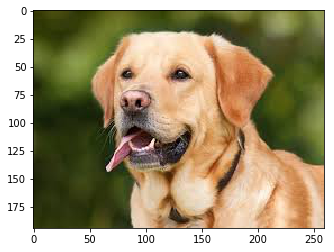

In [19]:
# Loading and viewing the image
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
img = Image.open("/content/download.jfif")
plt.imshow(img)
plt.plot()

In [20]:
# applying transforms to the image
from torchvision import transforms

transform = transforms.Compose([            
     transforms.Resize(256),                    
     transforms.CenterCrop(224),                
     transforms.ToTensor(),                     
     transforms.Normalize(                      
     mean=[0.485, 0.456, 0.406],                
     std=[0.229, 0.224, 0.225]                  
 )])
img = transform(img)

print(img.shape)
# adding batch value
img = img.unsqueeze(0)
print(img.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [11]:
# getting the classes
with open('/content/ImageNetClasses.txt',encoding = "ISO-8859-1") as f:
    classes = [line.strip() for line in f.readlines()]

print(len(classes))
# link to classes
# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

1000


In [24]:
import torch
import torchvision
from torchvision import models,transforms
resnet50 = models.resnet50(pretrained=True)
resnet50.eval()
prediction = resnet50(img)
 
percentage = torch.nn.functional.softmax(prediction, dim=1)[0] * 100

_, indices = torch.sort(prediction, descending=True)
for idx in indices[0][:5]:
    print(classes[idx], percentage[idx].item()) 

208: 'Labrador retriever', 84.61544036865234
207: 'golden retriever', 6.771239757537842
159: 'Rhodesian ridgeback', 2.247093915939331
168: 'redbone', 0.6164813041687012
852: 'tennis ball', 0.37784716486930847
